In [786]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [787]:
match = pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/matches.csv')
delivery = pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/deliveries.csv')

In [788]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [789]:
match.shape

(1095, 20)

In [790]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [791]:
delivery['match_id']

0          335982
1          335982
2          335982
3          335982
4          335982
           ...   
260915    1426312
260916    1426312
260917    1426312
260918    1426312
260919    1426312
Name: match_id, Length: 260920, dtype: int64

In [792]:
delivery.shape

(260920, 17)

In [793]:
# Create a mapping from old match_id to new match_id
match_id_mapping = {old_id: new_id for new_id, old_id in enumerate(match['id'].unique(), start=1)}

# Replace match_id in both DataFrames
match['id'] = match['id'].map(match_id_mapping)
delivery['match_id'] = delivery['match_id'].map(match_id_mapping)

In [794]:
delivery['match_id']

0            1
1            1
2            1
3            1
4            1
          ... 
260915    1095
260916    1095
260917    1095
260918    1095
260919    1095
Name: match_id, Length: 260920, dtype: int64

In [795]:
delivery.groupby(['match_id', 'inning']).sum()['total_runs']

match_id  inning
1         1         222
          2          82
2         1         240
          2         207
3         1         129
                   ... 
1093      2         174
1094      1         175
          2         139
1095      1         113
          2         114
Name: total_runs, Length: 2217, dtype: int64

In [796]:
total_score_df = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [797]:
total_score_df

,match_id,inning,total_runs
0,1,1,222
1,1,2,82
2,2,1,240
3,2,2,207
4,3,1,129
...,...,...,...
2212,1093,2,174
2213,1094,1,175
2214,1094,2,139
2215,1095,1,113


In [798]:
# Now, we will consider only the first inning of each match.
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [799]:
total_score_df

,match_id,inning,total_runs
0,1,1,222
2,2,1,240
4,3,1,129
6,4,1,165
8,5,1,110
...,...,...,...
2207,1091,1,214
2209,1092,1,159
2211,1093,1,172
2213,1094,1,175


In [800]:
match_df = match.merge(total_score_df[['match_id', 'total_runs']], left_on = 'id', right_on = 'match_id')

In [801]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,1,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,1,222
1,2,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,2,240
2,3,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,3,129
3,4,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,4,165
4,5,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,5,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1091,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1091,214
1091,1092,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1092,159
1092,1093,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1093,172
1093,1094,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1094,175


In [802]:
match_df.shape

(1095, 22)

In [803]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [804]:
teams = [
    'Royal Challengers Bengaluru',
    'Mumbai Indians',
    'Kolkata Knight Riders',
    'Rajasthan Royals',
    'Chennai Super Kings',
    'Sunrisers Hyderabad',
    'Delhi Capitals', 
    'Punjab Kings',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

In [805]:
# Standardize team names in matches DataFrame (BEFORE filtering)
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['toss_winner'] = match_df['toss_winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['winner'] = match_df['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')  # Fix winner column

match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
match_df['toss_winner'] = match_df['toss_winner'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
match_df['winner'] = match_df['winner'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')  # Fix winner

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['toss_winner'] = match_df['toss_winner'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['winner'] = match_df['winner'].str.replace('Kings XI Punjab', 'Punjab Kings')  # Fix winner


match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['toss_winner'] = match_df['toss_winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['winner'] = match_df['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')  # Fix winner

In [806]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [807]:
match_df['team1'].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [808]:
match_df['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bengaluru', 'Sunrisers Hyderabad',
       'Punjab Kings', 'Delhi Capitals', 'Mumbai Indians',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [809]:
match_df.shape

(980, 22)

In [810]:
# Duckworth-Lewis-Stern (DLS) method
match_df['method'].value_counts()

method
D/L    17
Name: count, dtype: int64

In [811]:
# DLS-affected matches

match_df[match_df['method'] == 'D/L'][['team1', 'team2', 'toss_winner', 'method']]

,team1,team2,toss_winner,method
38,Delhi Capitals,Punjab Kings,Delhi Capitals,D/L
41,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,D/L
60,Delhi Capitals,Punjab Kings,Delhi Capitals,D/L
63,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,D/L
89,Chennai Super Kings,Punjab Kings,Chennai Super Kings,D/L
221,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,D/L
231,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,D/L
429,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,D/L
476,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,D/L
508,Sunrisers Hyderabad,Royal Challengers Bengaluru,Sunrisers Hyderabad,D/L


In [812]:
# Lets consider matches where (DLS) method was not applied

match_df = match_df[match_df['method'] != 'D/L']

In [813]:
match_df.columns.tolist()

['id',
 'season',
 'city',
 'date',
 'match_type',
 'player_of_match',
 'venue',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'winner',
 'result',
 'result_margin',
 'target_runs',
 'target_overs',
 'super_over',
 'method',
 'umpire1',
 'umpire2',
 'match_id',
 'total_runs']

In [814]:
# extracting features from match dataset
match_df = match_df[['match_id','city','winner','total_runs']]
match_df.head()

,match_id,city,winner,total_runs
0,1,Bangalore,Kolkata Knight Riders,222
1,2,Chandigarh,Chennai Super Kings,240
2,3,Delhi,Delhi Capitals,129
3,4,Mumbai,Royal Challengers Bengaluru,165
4,5,Kolkata,Kolkata Knight Riders,110


In [815]:
# Replace old team names with new ones in delivery_df
delivery['batting_team'] = delivery['batting_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')

delivery['batting_team'] = delivery['batting_team'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')

delivery['batting_team'] = delivery['batting_team'].str.replace('Kings XI Punjab', 'Punjab Kings')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Kings XI Punjab', 'Punjab Kings')

delivery['batting_team'] = delivery['batting_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
delivery['bowling_team'] = delivery['bowling_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [816]:
delivery = delivery[delivery['batting_team'].isin(teams)]
delivery = delivery[delivery['bowling_team'].isin(teams)]

In [817]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [818]:
delivery_df = match_df.merge(delivery, on = 'match_id')

In [819]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [820]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN


In [821]:
delivery_df.shape

(111721, 20)

In [822]:
delivery_df.loc[:, 'current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [823]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,1,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,2,W Jaffer,...,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,3,W Jaffer,...,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,4,W Jaffer,...,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,5,R Dravid,...,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4


In [824]:
# now we will find runs left 
# (total runs x)- (current score) will give runs left 

delivery_df.loc[:, 'runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [825]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,1,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,1,221
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,1,wides,0,NaN,NaN,NaN,2,220
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,NaN,0,NaN,NaN,NaN,2,220
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,4,W Jaffer,...,1,0,1,NaN,0,NaN,NaN,NaN,3,219
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,5,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,4,218


In [826]:
# Now lets see how many balls left 

delivery_df['balls_left'] = 120 - (delivery_df['over']*6 + delivery_df['ball'])

In [827]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,221,119
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,220,118
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,220,117
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,219,116
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,218,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230977,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,110,3,61
230978,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,111,2,60
230979,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,112,1,59
230980,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,113,0,58


In [828]:
# now lets see how many wickets are left
# If a player is out, it is recorded next to their name; otherwise, it is marked as NaN.
# We will fill nan with 0

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# Wherever there is a name, we will replace it with 1.

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x == '0' else "1")

#Here,`x if x == 0` ensures that if the value is 0,it remains unchanged,and it replaces other values (names) with 1

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

# lets count how many wickets have been taken

wickets= delivery_df.groupby("match_id")['player_dismissed'].cumsum().values

# Lets see how many wickets are left 

delivery_df['wickets_left'] = 10- wickets

In [829]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,221,119,10
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,220,118,10
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,220,117,10
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,219,116,10
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,218,115,10


In [830]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
230977,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,NaN,0,0,NaN,NaN,110,3,61,8
230978,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,NaN,0,0,NaN,NaN,111,2,60,8
230979,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,NaN,0,0,NaN,NaN,112,1,59,8
230980,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,NaN,0,0,NaN,NaN,113,0,58,8
230981,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,...,1,NaN,0,0,NaN,NaN,114,-1,57,8


In [831]:
# Current run rate (crr)= runs/overs
delivery_df.loc[:, 'crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [832]:
# Required run rate:(rrr) 
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [833]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,1,R Dravid,...,0,0,NaN,NaN,1,221,119,10,6.000000,11.142857
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,2,W Jaffer,...,0,0,NaN,NaN,2,220,118,10,6.000000,11.186441
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,NaN,2,220,117,10,4.000000,11.282051
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,4,W Jaffer,...,0,0,NaN,NaN,3,219,116,10,4.500000,11.327586
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,5,R Dravid,...,0,0,NaN,NaN,4,218,115,10,4.800000,11.373913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230977,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,0,NaN,NaN,110,3,61,8,11.186441,0.295082
230978,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,0,NaN,NaN,111,2,60,8,11.100000,0.200000
230979,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,0,NaN,NaN,112,1,59,8,11.016393,0.101695
230980,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,0,NaN,NaN,113,0,58,8,10.935484,0.000000


In [834]:
# If winner and batting team are same then result will be 1 esle 0
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [835]:
delivery_df['result'] = delivery_df.apply(result, axis = 1)

In [836]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
124,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,1,R Dravid,...,0,NaN,NaN,1,221,119,10,6.000000,11.142857,0
125,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,2,W Jaffer,...,0,NaN,NaN,2,220,118,10,6.000000,11.186441,0
126,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,NaN,2,220,117,10,4.000000,11.282051,0
127,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,4,W Jaffer,...,0,NaN,NaN,3,219,116,10,4.500000,11.327586,0
128,1,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bengaluru,Kolkata Knight Riders,0,5,R Dravid,...,0,NaN,NaN,4,218,115,10,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230977,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,NaN,NaN,110,3,61,8,11.186441,0.295082,1
230978,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,NaN,NaN,111,2,60,8,11.100000,0.200000,1
230979,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,NaN,NaN,112,1,59,8,11.016393,0.101695,1
230980,1095,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,NaN,NaN,113,0,58,8,10.935484,0.000000,1


In [837]:
delivery_df['result'].value_counts()

result
1    57302
0    54419
Name: count, dtype: int64

In [838]:
# Now lets extract the columns that are required for our predictions
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x',
            'crr','rrr','result']]

In [839]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
124,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,221,119,10,222,6.000000,11.142857,0
125,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,220,118,10,222,6.000000,11.186441,0
126,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,220,117,10,222,4.000000,11.282051,0
127,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,219,116,10,222,4.500000,11.327586,0
128,Royal Challengers Bengaluru,Kolkata Knight Riders,Bangalore,218,115,10,222,4.800000,11.373913,0
...,...,...,...,...,...,...,...,...,...,...
230977,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3,61,8,113,11.186441,0.295082,1
230978,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2,60,8,113,11.100000,0.200000,1
230979,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1,59,8,113,11.016393,0.101695,1
230980,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,0,58,8,113,10.935484,0.000000,1


## shuffle: randomly reorder the data. It ensures that the data is not in any specific order, which helps prevent bias and improves model generalization.

In [840]:
final_df = final_df.sample(final_df.shape[0])

In [841]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
15757,Rajasthan Royals,Punjab Kings,Cape Town,97,68,4,139,4.846154,8.558824,0
179692,Sunrisers Hyderabad,Rajasthan Royals,Pune,187,75,7,210,3.066667,14.960000,0
178007,Kolkata Knight Riders,Royal Challengers Bengaluru,Sharjah,28,35,7,138,7.764706,4.800000,1
224791,Royal Challengers Bengaluru,Gujarat Titans,Ahmedabad,151,89,9,200,9.483871,10.179775,1
114101,Kolkata Knight Riders,Sunrisers Hyderabad,Delhi,122,93,9,162,8.888889,7.870968,0
...,...,...,...,...,...,...,...,...,...,...
96071,Delhi Capitals,Punjab Kings,Pune,110,73,8,165,7.021277,9.041096,1
36215,Punjab Kings,Mumbai Indians,Chandigarh,61,47,8,154,7.643836,7.787234,1
73348,Delhi Capitals,Kolkata Knight Riders,Raipur,134,115,10,136,2.400000,6.991304,1
44313,Chennai Super Kings,Mumbai Indians,Mumbai,45,29,6,164,7.846154,9.310345,0


In [842]:
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
count,111721.000000,111721.000000,111721.000000,111721.000000,111721.000000,1.117090e+05,111721.000000
mean,93.768719,62.487402,7.494285,168.742170,7.587475,NaN,0.512903
std,51.081266,33.465263,2.173986,30.689233,2.341020,NaN,0.499836
min,-6.000000,-3.000000,0.000000,62.000000,0.000000,-inf,0.000000
25%,54.000000,34.000000,6.000000,149.000000,6.391304,7.227273e+00,0.000000
50%,93.000000,63.000000,8.000000,168.000000,7.611940,9.000000e+00,1.000000
75%,132.000000,91.000000,9.000000,188.000000,8.848485,1.122581e+01,1.000000
max,286.000000,119.000000,10.000000,287.000000,36.000000,inf,1.000000


In [843]:
final_df.isnull().sum()

batting_team       0
bowling_team       0
city            6012
runs_left          0
balls_left         0
wickets_left       0
total_runs_x       0
crr                0
rrr               12
result             0
dtype: int64

In [844]:
final_df.dropna(inplace = True)

In [845]:
final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets_left    0
total_runs_x    0
crr             0
rrr             0
result          0
dtype: int64

In [846]:
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
count,105700.000000,105700.000000,105700.000000,105700.000000,105700.000000,1.057000e+05,105700.000000
mean,93.571779,62.517616,7.494721,168.681362,7.609770,NaN,0.515298
std,51.059817,33.452835,2.170231,30.809155,2.353857,NaN,0.499768
min,-6.000000,-3.000000,0.000000,62.000000,0.000000,-inf,0.000000
25%,53.000000,34.000000,6.000000,149.000000,6.405405,7.230769e+00,0.000000
50%,92.000000,63.000000,8.000000,168.000000,7.636364,9.000000e+00,1.000000
75%,131.000000,91.000000,9.000000,188.000000,8.875258,1.117808e+01,1.000000
max,286.000000,119.000000,10.000000,287.000000,36.000000,inf,1.000000


In [847]:
final_df = final_df[final_df['balls_left'] != 0]

In [848]:
final_df.shape

(105343, 10)

In [849]:
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
count,105343.000000,105343.000000,105343.000000,105343.000000,105343.000000,105343.000000,105343.000000
mean,93.821364,62.729484,7.510532,168.635325,7.608051,10.534870,0.516684
std,50.954863,33.310573,2.154919,30.813049,2.356434,13.860577,0.499724
min,-6.000000,-3.000000,0.000000,62.000000,0.000000,-510.000000,0.000000
25%,54.000000,35.000000,6.000000,149.000000,6.400000,7.227273,0.000000
50%,93.000000,63.000000,8.000000,168.000000,7.630435,9.000000,1.000000
75%,132.000000,92.000000,9.000000,188.000000,8.875000,11.142857,1.000000
max,286.000000,119.000000,10.000000,287.000000,36.000000,708.000000,1.000000


# Model Building

In [850]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [851]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
64706,Mumbai Indians,Chennai Super Kings,Bangalore,88,44,5,187,7.815789,12.000000
86904,Royal Challengers Bengaluru,Punjab Kings,Bangalore,138,57,5,198,5.714286,14.526316
37904,Chennai Super Kings,Kolkata Knight Riders,Chennai,52,68,9,139,10.038462,4.588235
168715,Royal Challengers Bengaluru,Chennai Super Kings,Mumbai,95,29,2,191,6.329670,19.655172
7205,Punjab Kings,Chennai Super Kings,Chennai,146,84,8,181,5.833333,10.428571
...,...,...,...,...,...,...,...,...,...
127054,Punjab Kings,Sunrisers Hyderabad,Hyderabad,14,6,1,132,6.210526,14.000000
199126,Chennai Super Kings,Mumbai Indians,Mumbai,5,12,7,157,8.444444,2.500000
144173,Delhi Capitals,Punjab Kings,Delhi,68,54,9,163,8.636364,7.555556
230777,Rajasthan Royals,Sunrisers Hyderabad,Chennai,53,19,4,175,7.247525,16.736842


In [852]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([('trf', OneHotEncoder(sparse = False, drop = 'first'), ['batting_team', 'bowling_team', 'city'])], remainder = 'passthrough')


In [853]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [854]:
pipe = Pipeline(steps = [
    ('step1', trf),
    ('step2', LogisticRegression(solver = 'liblinear'))
])

In [855]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [856]:
y_pred = pipe.predict(X_test)

In [857]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred)

0.8036451658835255

In [858]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     10189
           1       0.80      0.82      0.81     10880

    accuracy                           0.80     21069
   macro avg       0.80      0.80      0.80     21069
weighted avg       0.80      0.80      0.80     21069



In [859]:
pipe.predict_proba(X_test)   # probability of winning of each team  

array([[0.63471899, 0.36528101],
       [0.99857155, 0.00142845],
       [0.3914113 , 0.6085887 ],
       ...,
       [0.33761828, 0.66238172],
       [0.89553547, 0.10446453],
       [0.67729062, 0.32270938]])

In [860]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [863]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [864]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 143


,end_of_over,runs_after_over,wickets_in_over,lose,win
16422,1,6,0,8.9,91.1
16430,2,5,0,9.2,90.8
16437,3,9,0,7.2,92.8
16443,4,1,1,16.0,84.0
16449,5,10,1,20.2,79.8
16455,6,2,0,23.9,76.1
16461,7,3,1,39.8,60.2
16467,8,9,0,34.2,65.8
16475,9,11,0,26.6,73.4
16481,10,4,0,28.3,71.7


Text(0.5, 1.0, 'Target-143')

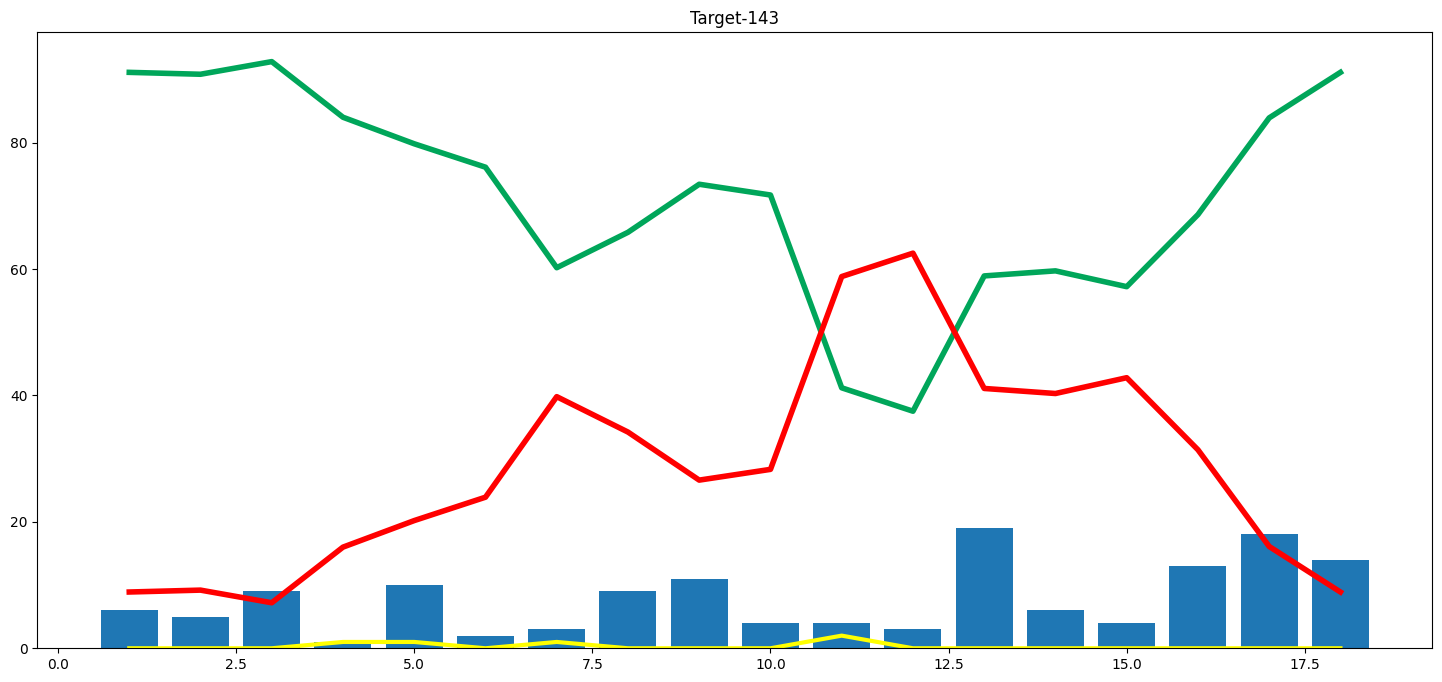

In [865]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [866]:
teams

['Royal Challengers Bengaluru',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Punjab Kings',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [867]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [869]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))